In [0]:
import pandas as pd
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
sub_list = ["Sub" + str(i) for i in range(2, 21)]
sub_list.remove('Sub4')

print(sub_list)

DATA_FOLDER = r'D:/NUS_TERM2_CA3/MAREA_dataset'
PROCESSED_FOLDER = os.path.join(DATA_FOLDER, 'Processed_data')

full_df = pd.read_csv(os.path.join(PROCESSED_FOLDER, 'Sub1_processed.csv'))
full_df = full_df.drop(full_df.columns[[0]], axis=1)

for sub in sub_list:
    tmp_df = pd.read_csv(os.path.join(PROCESSED_FOLDER, sub + '_processed.csv'))
    tmp_df = tmp_df.drop(tmp_df.columns[[0]], axis=1)

    full_df = full_df.append(tmp_df)

print(full_df.head())

['Sub2', 'Sub3', 'Sub5', 'Sub6', 'Sub7', 'Sub8', 'Sub9', 'Sub10', 'Sub11', 'Sub12', 'Sub13', 'Sub14', 'Sub15', 'Sub16', 'Sub17', 'Sub18', 'Sub19', 'Sub20']
    accX_LF   accY_LF   accZ_LF    accX_RF    accY_RF    accZ_RF  accX_Waist  accY_Waist  accZ_Waist  accX_Wrist  accY_Wrist  accZ_Wrist            label
0  0.332763  4.665276  1.203748  29.928555  39.261268  29.893765    4.085569   12.973653   16.509466    4.599891    0.317562   -0.000466  tread_flat_walk
1 -0.119334  6.199085  0.927106  30.093561  37.685433  28.674644    4.088255   13.046742   16.670780    4.285543    1.170696    0.114250  tread_flat_walk
2 -0.100431  5.849893  0.649464  30.415558  36.893585  28.082513    4.090938   13.119826   16.361089    4.442194    1.396830    0.385996  tread_flat_walk
3  0.240428  6.128695  0.685820  29.952524  35.317699  26.706353    4.093618   12.878897   16.208382    4.912840    1.465963    0.970805  tread_flat_walk
4  0.602893  6.564487  0.722174  28.705430  33.898736  25.801135    3.6262

In [0]:
y = full_df['label']
X = full_df.drop('label', axis=1)

print(y.unique())

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 5)

print(X_train.shape)
print(y_train.shape)


['tread_flat_walk' 'tread_flat_run' 'rest' 'tread_slope_walk'
 'indoor_flat_walk' 'indoor_flat_run' 'outdoor_walk' 'outdoor_run']
(2454390, 12)
(2454390,)


In [0]:
import xgboost as xgboost
import time

print('#Option 2: xgboost')
model = xgboost.XGBClassifier()
start = time.time()
model.fit(X_train, y_train)
end = time.time()
timing = end - start
print(str(timing))
print(model)


#Option 2: xgboost
2995.4418275356293
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


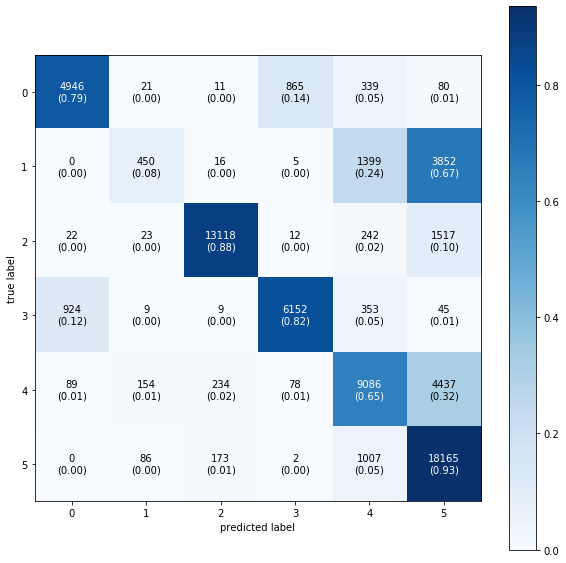

                  precision    recall  f1-score   support

 indoor_flat_run       0.83      0.79      0.81      6262
indoor_flat_walk       0.61      0.08      0.14      5722
            rest       0.97      0.88      0.92     14934
  tread_flat_run       0.86      0.82      0.84      7492
 tread_flat_walk       0.73      0.65      0.69     14078
tread_slope_walk       0.65      0.93      0.76     19433

        accuracy                           0.76     67921
       macro avg       0.77      0.69      0.69     67921
    weighted avg       0.77      0.76      0.74     67921

Accuracy= 0.7643733160583619


In [0]:
# make predictions for test data
y_pred = model.predict(X_test)



from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True,
                                    class_names=y_train.unique(),
                                    figsize=(10, 10))

plt.savefig('XGB' + '_confusion_matrix', dpi=300)
plt.show()

print(classification_report(y_test, y_pred, target_names=class_label, digits=4))

from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy=", metrics.accuracy_score(y_test, y_pred))


In [0]:
import numpy as np
print(np.unique(y_pred))
print(np.unique(y_test))

['indoor_flat_run' 'indoor_flat_walk' 'rest' 'tread_flat_run'
 'tread_flat_walk' 'tread_slope_walk']
['indoor_flat_run' 'indoor_flat_walk' 'outdoor_run' 'outdoor_walk' 'rest'
 'tread_flat_run' 'tread_flat_walk' 'tread_slope_walk']
